In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import scipy.stats as stats

# Always make it pretty.
plt.style.use('ggplot')

In [3]:
ls *.csv

actor_age.csv        actors_name.csv                movies.csv*
actor_words.csv      assigned_cluster_datasets.csv  movies_crew.csv*
actor_words_5p.csv   averageRating_overyear.csv*    people_year.csv
actor_words_bad.csv  df_1000p_words_index.csv       principals.csv
actors_70s.csv       movie_year.csv


In [4]:
temp1 = pd.read_csv("movies_crew.csv")
temp1.head()

/home/ubuntu/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,titleId,title_ordering,title,region,language,titleType,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers
0,0,tt0004272,1,"Lucille Love, la chica misteriosa",VE,\N,movie,0,1914,\N,300,Action,5.8,9,nm0285643,"nm0192062,nm0285643"
1,1,tt0004272,2,Lucille Love: The Girl of Mystery,US,\N,movie,0,1914,\N,300,Action,5.8,9,nm0285643,"nm0192062,nm0285643"
2,2,tt0004272,3,Lucille Love: The Girl of Mystery,\N,\N,movie,0,1914,\N,300,Action,5.8,9,nm0285643,"nm0192062,nm0285643"
3,3,tt0004336,1,El misterio del millón de dólares,ES,\N,movie,0,1914,\N,\N,"Adventure,Mystery",5.5,21,nm0360617,"nm0518840,nm0569805"
4,4,tt0004336,2,The Million Dollar Mystery,\N,\N,movie,0,1914,\N,\N,"Adventure,Mystery",5.5,21,nm0360617,"nm0518840,nm0569805"


In [5]:
temp1_drop = temp1[['titleId','title_ordering', 'title', 'region', 'genres', 'averageRating', 'numVotes']]
temp1_drop.head()

,titleId,title_ordering,title,region,genres,averageRating,numVotes
0,tt0004272,1,"Lucille Love, la chica misteriosa",VE,Action,5.8,9
1,tt0004272,2,Lucille Love: The Girl of Mystery,US,Action,5.8,9
2,tt0004272,3,Lucille Love: The Girl of Mystery,\N,Action,5.8,9
3,tt0004336,1,El misterio del millón de dólares,ES,"Adventure,Mystery",5.5,21
4,tt0004336,2,The Million Dollar Mystery,\N,"Adventure,Mystery",5.5,21


In [6]:
temp1_keep_US = temp1_drop[temp1_drop['region'] == 'US']
temp1_keep_US.head()

,titleId,title_ordering,title,region,genres,averageRating,numVotes
1,tt0004272,2,Lucille Love: The Girl of Mystery,US,Action,5.8,9
5,tt0004336,3,The Million Dollar Mystery,US,"Adventure,Mystery",5.5,21
6,tt0005209,1,Don Quixote,US,Drama,5.7,9
7,tt0006204,1,The Valley of Decision,US,Drama,6.2,6
11,tt0006489,4,The Captive God,US,"Adventure,History",5.3,15


In [11]:
temp1_keep_US.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116465 entries, 1 to 1219521
Data columns (total 7 columns):
titleId           116465 non-null object
title_ordering    116465 non-null int64
title             116465 non-null object
region            116465 non-null object
genres            116465 non-null object
averageRating     116465 non-null float64
numVotes          116465 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 7.1+ MB


In [17]:
# temp1_keep_US['titleId'].value_counts()

In [12]:
temp1_keep_US.drop_duplicates(subset ="titleId", 
                     keep = 'first', inplace = True)
temp1_keep_US.head()

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,titleId,title_ordering,title,region,genres,averageRating,numVotes
1,tt0004272,2,Lucille Love: The Girl of Mystery,US,Action,5.8,9
5,tt0004336,3,The Million Dollar Mystery,US,"Adventure,Mystery",5.5,21
6,tt0005209,1,Don Quixote,US,Drama,5.7,9
7,tt0006204,1,The Valley of Decision,US,Drama,6.2,6
11,tt0006489,4,The Captive God,US,"Adventure,History",5.3,15


In [13]:
print(temp1_keep_US.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92041 entries, 1 to 1219521
Data columns (total 7 columns):
titleId           92041 non-null object
title_ordering    92041 non-null int64
title             92041 non-null object
region            92041 non-null object
genres            92041 non-null object
averageRating     92041 non-null float64
numVotes          92041 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 5.6+ MB
None


In [15]:
# temp1_keep_US['titleId'].value_counts()

In [19]:
moives_genres_df = temp1_keep_US[['titleId', 'genres']]
moives_genres_df.head()

,titleId,genres
1,tt0004272,Action
5,tt0004336,"Adventure,Mystery"
6,tt0005209,Drama
7,tt0006204,Drama
11,tt0006489,"Adventure,History"


In [32]:
moives_genres_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92041 entries, 1 to 1219521
Data columns (total 2 columns):
titleId    92041 non-null object
genres     92041 non-null object
dtypes: object(2)
memory usage: 2.1+ MB


In [25]:
genres_list=set()
row =0
for i in moives_genres_df['genres'].str.split(','):
    try:
        genres_list=set().union(i,genres_list)
    except:
        print(row)
        continue
    row +=1
genres_list=list(genres_list)
genres_list.remove('\\N')

In [27]:
moives_genres = moives_genres_df.copy()
for n in genres_list:
    moives_genres[n]=moives_genres_df['genres'].str.contains(n).apply(lambda x:1 if x else 0)

In [28]:
moives_genres.head()

,titleId,genres,Adult,Adventure,Romance,History,Crime,Western,Fantasy,Documentary,...,Short,Game-Show,Comedy,Biography,Sport,Musical,Music,Family,Drama,Film-Noir
1,tt0004272,Action,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,tt0004336,"Adventure,Mystery",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,tt0005209,Drama,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,tt0006204,Drama,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11,tt0006489,"Adventure,History",0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
moives_genres = moives_genres[moives_genres['genres'] != '\\N']

In [9]:
moives_genres.to_csv('moives_genres.csv',index=False)

In [11]:
moives_genres = pd.read_csv('moives_genres.csv')
moives_genres.head()

,titleId,genres,Adult,Adventure,Romance,History,Crime,Western,Fantasy,Documentary,...,Short,Game-Show,Comedy,Biography,Sport,Musical,Music,Family,Drama,Film-Noir
0,tt0004272,Action,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0004336,"Adventure,Mystery",0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0005209,Drama,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,tt0006204,Drama,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,tt0006489,"Adventure,History",0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
genres_sum.Adult

2973

In [22]:
genres_sum = (moives_genres.groupby('titleId').sum()).sum()

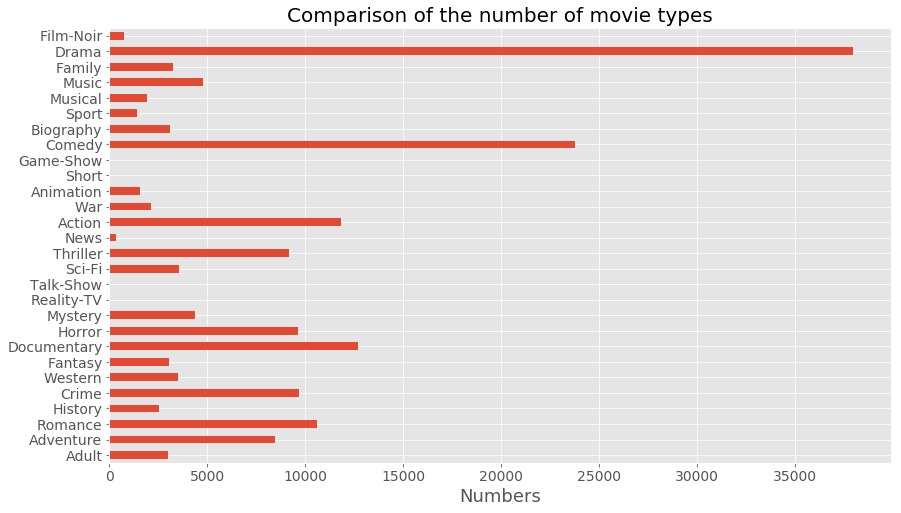

In [25]:
genres_sum.plot(kind='barh',label='genres',figsize=(14,8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Comparison of the number of movie types',fontsize=20)
plt.xlabel('Numbers',fontsize=18)
plt.show()

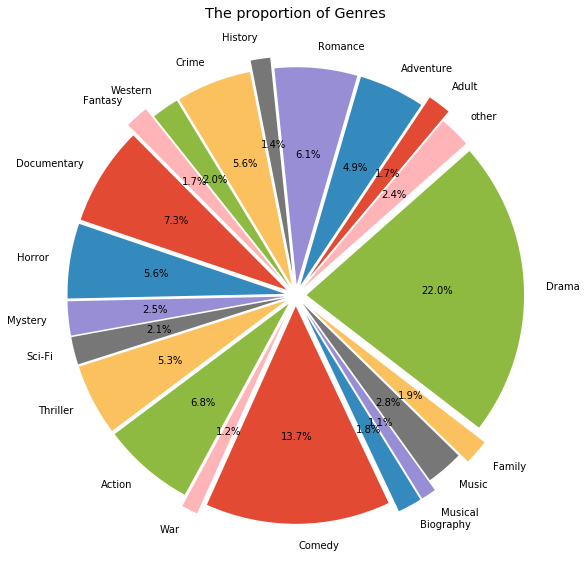

In [26]:
genres_per = genres_sum/genres_sum.sum()
others = 0.01
genres_pern = genres_per[genres_per>=others]
genres_pern['other'] = genres_per[genres_per < others].sum()
explode = (genres_pern <= 0.02)/20 + 0.05

genres_pern.plot(kind = 'pie',label='',startangle=50,shadow = False,figsize = (10,10), autopct = '%1.1f%%',explode=explode)
plt.title('The proportion of Genres')
plt.show()

# movies genres -> crew genres

In [13]:
actors_movies = pd.read_csv("principals.csv")
actors_movies.head()

,tconst,nconst
0,tt1479805,nm3166689
1,tt1479992,nm0199039
2,tt1481551,nm3557069
3,tt1482567,nm0521786
4,tt1483010,nm1795989


In [14]:
actors_name = pd.read_csv('actors_70s.csv')
actors_name.head()

,name_id,name
0,nm0005211,Danica McKellar
1,nm0005576,Drea de Matteo
2,nm0011589,Amanda Aday
3,nm0013684,Cesar Aguirre
4,nm0028846,Shawn Andrews


In [32]:
ls *.tsv

name.basics.tsv*


In [1]:
import findspark
findspark.init('/home/ubuntu/spark')
import pyspark
sc = pyspark.SparkContext(appName="Actorsnamebasics2")

In [2]:
spark = (pyspark.sql.SparkSession
         .builder        
         .appName('Actorsnamebasics2')
         .getOrCreate()
        )

In [3]:
def transform_to_df(path, sep_input="\t"):
    return spark.read.csv(path,
                         header=True,       # use headers or not
                         quote='"',         # char for quotes
                         sep=sep_input,           # char for separation
                         inferSchema=True)  # do we infer schema or not ?

In [4]:
name_basics = transform_to_df("name.basics.tsv", "\t")

In [5]:
name_basics.printSchema()

root
 |-- nconst: string (nullable = true)
 |-- primaryName: string (nullable = true)
 |-- birthYear: string (nullable = true)
 |-- deathYear: string (nullable = true)
 |-- primaryProfession: string (nullable = true)
 |-- knownForTitles: string (nullable = true)



In [6]:
name_basics.registerTempTable("name_basics_t")

In [7]:
sparkTable = spark.sql(
"""
SELECT DISTINCT nconst, primaryName, primaryProfession, knownForTitles FROM name_basics_t WHERE (primaryProfession LIKE '%actor%') or (primaryProfession LIKE '%actress%')
"""
)

In [9]:
sparkTable.show()

+---------+--------------------+--------------------+--------------------+
|   nconst|         primaryName|   primaryProfession|      knownForTitles|
+---------+--------------------+--------------------+--------------------+
|nm0000430|    Steve Guttenberg|actor,producer,so...|tt0087928,tt00941...|
|nm0000524|Mary Stuart Maste...|actress,producer,...|tt0106387,tt00737...|
|nm0000617|       Tanya Roberts|    actress,producer|tt0083630,tt00881...|
|nm0000672|           Meg Tilly|      actress,writer|tt1955311,tt00886...|
|nm0000767| Jean-Hugues Anglade|actor,director,wr...|tt0100263,tt01109...|
|nm0000799|        Edward Asner|actor,soundtrack,...|tt0102138,tt03193...|
|nm0000906|      Annette Bening|actress,soundtrac...|tt0842926,tt43858...|
|nm0000936|     Martine Beswick|  actress,soundtrack|tt0059800,tt00614...|
|nm0001522|      Roddy McDowall|actor,producer,so...|tt0068408,tt00891...|
|nm0001542|            Jay Mohr|actor,writer,prod...|tt0139239,tt02238...|
|nm0002478|       Ernst G

In [13]:
name_basics_70s = spark.read.csv("actors_70s.csv",header=True)
name_basics_70s.registerTempTable("name_basics_70s_t")

In [29]:
sparkTable_70s = spark.sql(
"""
SELECT T.name_id, T.name, T.primaryProfession, T.knownForTitles FROM (
    (SELECT DISTINCT nconst, primaryName, primaryProfession, knownForTitles 
     FROM name_basics_t 
     WHERE (primaryProfession LIKE '%actor%') or (primaryProfession LIKE '%actress%')) as T1 
     JOIN name_basics_70s_t ON T1.nconst = name_basics_70s_t.name_id
     ) as T
"""
)

In [30]:
sparkTable_70s.show()

+---------+--------------------+--------------------+--------------------+
|  name_id|                name|   primaryProfession|      knownForTitles|
+---------+--------------------+--------------------+--------------------+
|nm0005141|         Sean Lennon|soundtrack,actor,...|tt3727982,tt03697...|
|nm0074986|     Karin Bergquist|             actress|tt1139797,tt07913...|
|nm0097504|       Alex Borstein|actress,music_dep...|tt0327554,tt03856...|
|nm0115816|   Catherine Bruhier|actress,producer,...|tt0108756,tt17587...|
|nm0177528|       Danny Cooksey|    actor,soundtrack|tt1482459,tt01030...|
|nm0215682|   Matthew Del Negro|actor,producer,di...|tt8009602,tt46878...|
|nm0266623|         Pui Fan Lee|      actress,writer|tt0362192,tt01087...|
|nm0528462|         Susan Lynch|actress,soundtrac...|tt0375735,tt01663...|
|nm0536630|        Sean Maguire|    actor,soundtrack|tt1843230,tt10734...|
|nm0557287|        Bryan Massey| actor,stunts,writer|tt1502404,tt11754...|
|nm0564167|        Bryn M

In [31]:
actors_filtered_pd = sparkTable_70s.toPandas()
actors_filtered_pd.head()

,name_id,name,primaryProfession,knownForTitles
0,nm0005141,Sean Lennon,"soundtrack,actor,composer","tt3727982,tt0369735,tt1322312,tt3579524"
1,nm0074986,Karin Bergquist,actress,"tt1139797,tt0791315,tt2511776,tt1781237"
2,nm0097504,Alex Borstein,"actress,music_department,writer","tt0327554,tt0385690,tt0182576,tt0307987"
3,nm0115816,Catherine Bruhier,"actress,producer,writer","tt0108756,tt1758772,tt2083355,tt3205802"
4,nm0177528,Danny Cooksey,"actor,soundtrack","tt1482459,tt0103064,tt0101190,tt0077003"


In [32]:
actors_filtered_pd.to_csv("actors_filtered_pd.csv", index=False)

In [4]:
actors_filtered_pd = pd.read_csv("actors_filtered_pd.csv")

In [5]:
actors_filtered_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13674 entries, 0 to 13673
Data columns (total 4 columns):
name_id              13674 non-null object
name                 13674 non-null object
primaryProfession    13674 non-null object
knownForTitles       13674 non-null object
dtypes: object(4)
memory usage: 427.4+ KB


In [ ]:
actors_filtered_pd[actors_filtered_pd[]]

In [22]:
def columns_list(df, columns, sep=','):
    result_list=set()
    row =0
    for i in df[columns].str.split(sep):
        try:
            result_list=set().union(i, result_list)
        except:
            print(row)
            continue
        row +=1
    result_list=list(result_list)
    result_list.sort()
    return result_list

In [23]:
profession_list = columns_list(actors_filtered_pd, 'primaryProfession', sep=',')

In [24]:
crews_primaryprofession_pd = actors_filtered_pd[['name_id', 'name']]
for n in profession_list:
    crews_primaryprofession_pd[n]=actors_filtered_pd['primaryProfession'].str.contains(n).apply(lambda x:1 if x else 0)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
crews_primaryprofession_pd.head()

,name_id,name,actor,actress,animation_department,art_department,art_director,assistant,assistant_director,camera_department,...,publicist,set_decorator,sound_department,soundtrack,special_effects,stunts,talent_agent,transportation_department,visual_effects,writer
0,nm0005141,Sean Lennon,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,nm0074986,Karin Bergquist,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,nm0097504,Alex Borstein,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,nm0115816,Catherine Bruhier,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,nm0177528,Danny Cooksey,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [26]:
profession_sum = (crews_primaryprofession_pd.groupby('name_id').sum()).sum()

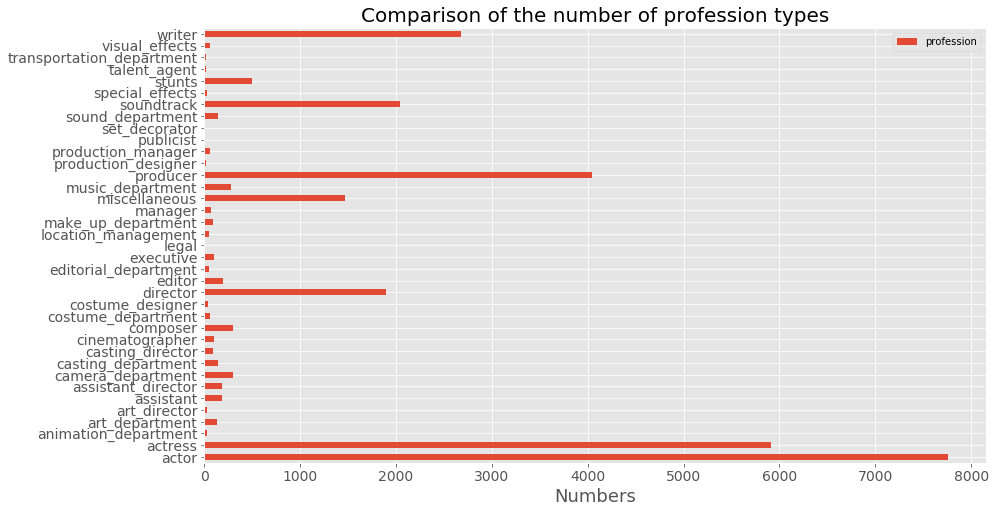

<Figure size 432x288 with 0 Axes>

In [30]:
profession_sum.plot(kind='barh',label='profession',figsize=(14,8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Comparison of the number of profession types',fontsize=20)
plt.xlabel('Numbers',fontsize=18)
plt.legend()
plt.show()
plt.savefig('crews_profession_types.png')

In [29]:
crews_primaryprofession_pd.to_csv('crews_primaryprofession.csv', index= False)

In [32]:
crews_ActorOrActress_pd = crews_primaryprofession_pd[['name_id', 'name', 'actor', 'actress']]
crews_ActorOrActress_pd['knownForTitles'] = actors_filtered_pd[actors_filtered_pd.name_id == crews_primaryprofession_pd.name_id]['knownForTitles']
crews_ActorOrActress_pd.head()

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,name_id,name,actor,actress,knownForTitles
0,nm0005141,Sean Lennon,1,0,"tt3727982,tt0369735,tt1322312,tt3579524"
1,nm0074986,Karin Bergquist,0,1,"tt1139797,tt0791315,tt2511776,tt1781237"
2,nm0097504,Alex Borstein,0,1,"tt0327554,tt0385690,tt0182576,tt0307987"
3,nm0115816,Catherine Bruhier,0,1,"tt0108756,tt1758772,tt2083355,tt3205802"
4,nm0177528,Danny Cooksey,1,0,"tt1482459,tt0103064,tt0101190,tt0077003"


In [43]:
crews_ActorOrActress_pd = crews_ActorOrActress_pd[crews_ActorOrActress_pd.knownForTitles!='\\N']

In [44]:
crews_ActorOrActress_pd[crews_ActorOrActress_pd.knownForTitles=='\\N']

,name_id,name,actor,actress,knownForTitles


In [45]:
crews_ActorOrActress_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13668 entries, 0 to 13673
Data columns (total 5 columns):
name_id           13668 non-null object
name              13668 non-null object
actor             13668 non-null int64
actress           13668 non-null int64
knownForTitles    13668 non-null object
dtypes: int64(2), object(3)
memory usage: 640.7+ KB
